## DBSCAN works with non-linear data also

## we always need to do standard scaling in clustering

In [ ]:
from sklearn.cluster import DBSCAN

In [2]:
from sklearn.datasets import make_moons ## to create non-linear data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x,y=make_moons(n_samples=250,noise=0.05)

In [6]:
x.shape

(250, 2)

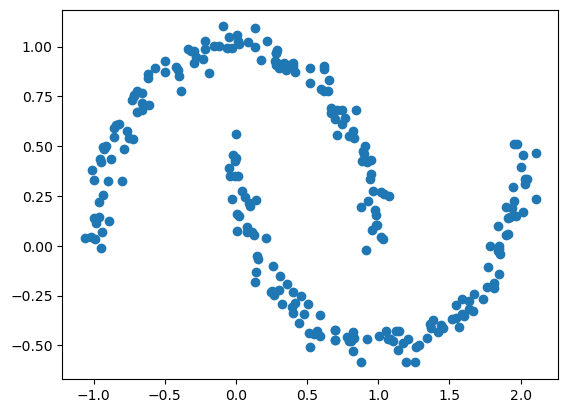

In [8]:
plt.scatter(x[:,0],x[:,1])

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()

In [11]:
x_scaled=scaler.fit_transform(x)

In [12]:
## Apply DBSCAN
dbscan=DBSCAN(eps=0.5) ## eps is the radius of the circle

In [14]:
dbscan.fit(x_scaled)

DBSCAN()

In [16]:
dbscan.labels_

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1])

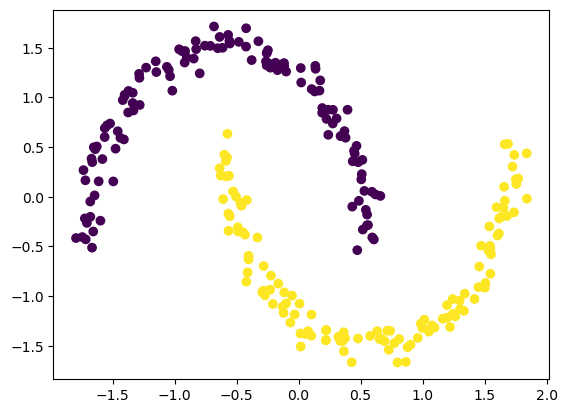

In [17]:
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=dbscan.labels_)

In [19]:
## lets try to do the same dataset with kmeans algorithm

In [26]:
from sklearn.cluster import KMeans

In [30]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [29]:
wcss

[206.2096685209359,
 151.40758947231268,
 100.19353799263565,
 74.55249568800832,
 56.844381185223675,
 43.43210886645644,
 33.28088602062744,
 27.359069507933235,
 22.445401702394914]

([<matplotlib.axis.XTick at 0x7fb07bdcc8e0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

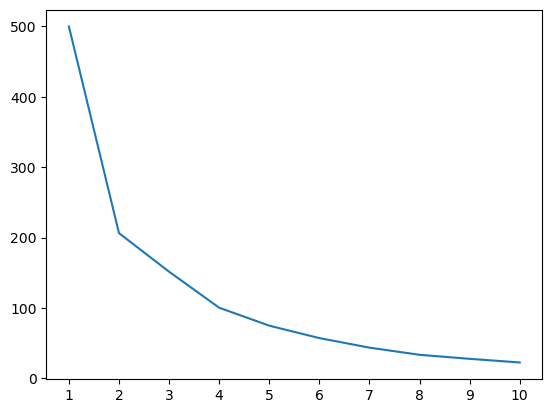

In [47]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))

In [32]:
## lets take k=4
kmeans=KMeans(n_clusters=4,init='k-means++')

In [34]:
y_label=kmeans.fit_predict(x_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
y_label

array([3, 3, 3, 0, 0, 1, 0, 2, 3, 2, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 3, 1,
       1, 2, 0, 3, 3, 1, 0, 2, 3, 0, 3, 3, 1, 1, 0, 1, 0, 2, 0, 1, 0, 2,
       3, 0, 0, 3, 1, 3, 3, 1, 0, 2, 3, 2, 1, 0, 3, 1, 2, 1, 1, 3, 1, 3,
       2, 3, 2, 3, 3, 0, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 0, 3, 1, 0, 1, 3,
       0, 1, 3, 0, 3, 2, 1, 3, 1, 0, 3, 3, 2, 1, 1, 2, 3, 2, 0, 2, 1, 0,
       2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 3, 1, 1, 3, 2, 1, 1, 3,
       3, 2, 3, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 2,
       2, 0, 2, 2, 3, 3, 1, 1, 2, 3, 2, 0, 0, 2, 2, 3, 3, 1, 3, 2, 1, 2,
       0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 0, 2, 2, 3, 3, 2, 1, 1, 3, 2, 3, 2,
       2, 1, 0, 1, 2, 0, 0, 1, 3, 3, 1, 1, 3, 2, 1, 3, 2, 0, 0, 1, 2, 0,
       2, 3, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 3, 1, 0, 0, 2, 3, 0, 2, 2,
       2, 3, 1, 3, 2, 1, 2, 0], dtype=int32)

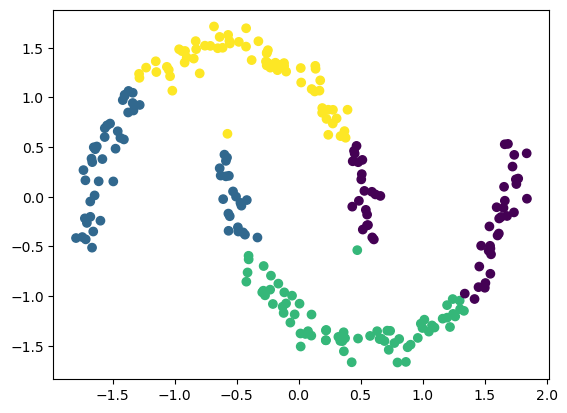

In [36]:
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=y_label)

In [40]:
## lets find k value using kneed

In [41]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [42]:
from kneed import KneeLocator

In [44]:
locator=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [45]:
locator.elbow

3

In [48]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [49]:
kmeans.fit(x_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [50]:
y_label=kmeans.predict(x_scaled)

In [51]:
y_label

array([2, 2, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0,
       0, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 2,
       1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, 2,
       2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1,
       1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 1, 1, 0, 1, 1,
       1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 0, 0, 1, 0, 1, 1], dtype=int32)

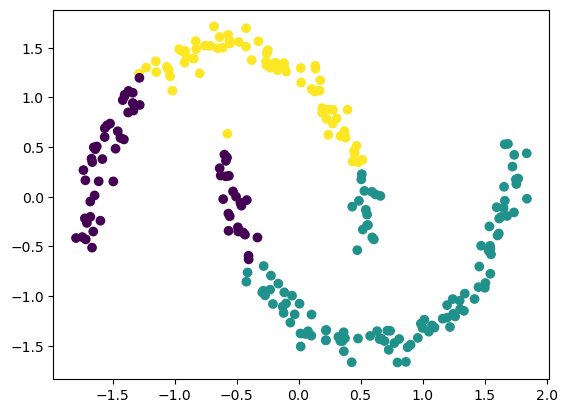

In [53]:
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=y_label)

## so we can see DBSCAN works well with non-linear data